In [139]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Ayushi_Kansara\AppData\Local\Temp\pip-install-_n46ncgd\tensorflow-gpu_4b1a0319e8524a5db00fef04ab943566\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could

In [2]:
import tensorflow as tf
import os

In [141]:
# gpus = tf.config.experimental.list_physical_devices('CPU')
# len(gpus)

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import cv2
import imghdr

C:\Users\Ayushi_Kansara\AppData\Local\Temp\ipykernel_33060\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = "data"
image_exts = ["jpeg", "png", "bmp", "png"]

In [6]:
# import matplotlib.pyplot as plt
# img = cv2.imread(os.path.join('data', 'geto', "Getou.Suguru.full.3251049.jpg"))
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [7]:
for img_class in os.listdir(data_dir):    # for cat and dog
    for image in os.listdir(os.path.join(data_dir, img_class)):  #for each image
        image_path = os.path.join(data_dir, img_class, image)
        try:
            img = cv2.imread(image_path)   #converts to numpy array pewpew
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except:
            print('Issue with image {}'.format(image_path)) 
            os.remove(image_path)

In [8]:
# tf.data.Dataset??

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size=32)  #building data pipeline

Found 171 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()  #allows access
batch = data_iterator.next()              #gives access

In [12]:
print(batch[0].shape)
batch[0]

(32, 256, 256, 3)


array([[[[251.34811   , 254.98587   , 251.77734   ],
         [255.        , 253.        , 247.58316   ],
         [249.0618    , 254.92934   , 255.        ],
         ...,
         [254.        , 254.        , 254.        ],
         [254.        , 254.        , 254.        ],
         [254.        , 254.        , 254.        ]],

        [[250.19614   , 255.        , 254.80386   ],
         [255.        , 253.61914   , 250.        ],
         [252.23135   , 254.83115   , 254.7255    ],
         ...,
         [254.        , 254.        , 254.        ],
         [254.        , 254.        , 254.        ],
         [254.        , 254.        , 254.        ]],

        [[248.8718    , 255.        , 255.        ],
         [252.7255    , 254.788     , 253.81924   ],
         [253.58665   , 252.08328   , 246.5515    ],
         ...,
         [254.        , 254.        , 254.        ],
         [254.        , 254.        , 254.        ],
         [254.        , 254.        , 254.        ]],

In [13]:
batch[1]  
#images at index 0 and labels at index 1 

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [15]:
# fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

# # 0 = kitty
# # 1 = doggie


In [16]:
# pre processing
data = data.map(lambda x, y: (x/255, y))

In [33]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0]

array([[[[0.5656863 , 0.5421569 , 0.311443  ],
         [0.5718903 , 0.5483609 , 0.31764707],
         [0.5767923 , 0.55179226, 0.3258119 ],
         ...,
         [0.5763021 , 0.59051776, 0.30228248],
         [0.57581186, 0.59149814, 0.30130208],
         [0.56894916, 0.58463544, 0.29443935]],

        [[0.5745328 , 0.5421569 , 0.31765473],
         [0.5715763 , 0.53920037, 0.31469822],
         [0.5781997 , 0.5447218 , 0.32169023],
         ...,
         [0.57009035, 0.58430606, 0.29607078],
         [0.56960016, 0.58528644, 0.29509038],
         [0.5656863 , 0.58137256, 0.29117647]],

        [[0.57321537, 0.53070617, 0.31862745],
         [0.57615656, 0.53364736, 0.32156864],
         [0.57664675, 0.53315717, 0.32156864],
         ...,
         [0.57303923, 0.5872549 , 0.2990196 ],
         [0.57254905, 0.5882353 , 0.29803923],
         [0.5656863 , 0.58137256, 0.29117647]],

        ...,

        [[0.20617628, 0.32762715, 0.02982345],
         [0.2233925 , 0.32507852, 0.04656959]

In [19]:
# batch[0].max()

In [20]:
# fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img)
#     ax[idx].title.set_text(batch[1][idx])

In [21]:
# splitting into train and test sets
len(data)  # 9 batches of 32 images each 

6

In [22]:
# take and skip are features of tensorflow pipelines to help build training, validation and test sets
train = data.take(4)
val = data.skip(5).take(1)
test = data.skip(5).take(1)

In [23]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# Convolutional Neural Network, Max Pooling condenses the data and "pools" 
# the regions together varna outputs become unmanageable (just like life ahaahaha)

In [24]:
model = Sequential()  

In [25]:
# adding layers of neuronssss
# parameters = no. of kernels, size of kernels, stride, activation func

#convolution block 1
model.add(Conv2D(16, (3, 3), 1, activation = "relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

#convolution block 2
model.add(Conv2D(32, (3, 3), 1, activation = "relu"))
model.add(MaxPooling2D())

#convolution block 3
model.add(Conv2D(16, (3, 3), 1, activation = "relu"))
model.add(MaxPooling2D())

# flattening reduces the output for it to be passed through Dense
model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [26]:
def binary_crossentropy_loss(y_true, y_pred):
    return tf.losses.binary_crossentropy(y_true, y_pred)

In [27]:
model.compile(optimizer='adam', loss=binary_crossentropy_loss, metrics=['accuracy'])


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
trained_model = model.fit(train, epochs = 20, validation_data = val)

Epoch 1/20
4/4 [==============================] - 9s 2s/step - loss: 0.8826 - accuracy: 0.5312 - val_loss: 0.7227 - val_accuracy: 0.4545
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 0.7043 - accuracy: 0.5391 - val_loss: 0.6595 - val_accuracy: 0.6364
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 0.6716 - accuracy: 0.6094 - val_loss: 0.6740 - val_accuracy: 0.6364
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 0.6266 - accuracy: 0.6797 - val_loss: 0.6062 - val_accuracy: 0.6364
Epoch 5/20
4/4 [==============================] - 8s 1s/step - loss: 0.5894 - accuracy: 0.6719 - val_loss: 0.5014 - val_accuracy: 0.8182
Epoch 6/20
4/4 [==============================] - 7s 1s/step - loss: 0.5407 - accuracy: 0.7578 - val_loss: 0.5147 - val_accuracy: 0.8182
Epoch 7/20
4/4 [==============================] - 7s 1s/step - loss: 0.4512 - accuracy: 0.8438 - val_loss: 0.4893 - val_accuracy: 0.8182
Epoch 8/20
4/4 [=========================

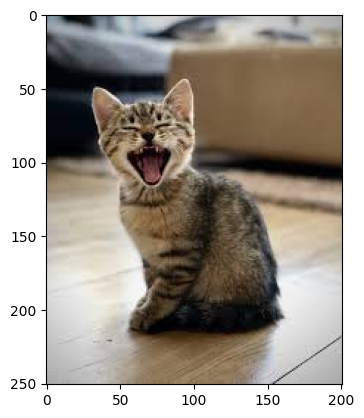

In [34]:
#testing on test set
img1 = cv2.imread('test_kitty.png')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

In [37]:
resize1 = tf.image.resize(img1, (256, 256))
input1 = np.expand_dims(resize1/255, 0)
ypred1 = model.predict(input1)
# ypred1
if ypred1[0] < 0.5:
    print("CAT")
else:
    print("DOG")

1/1 [==============================] - 0s 40ms/step
CAT


[]

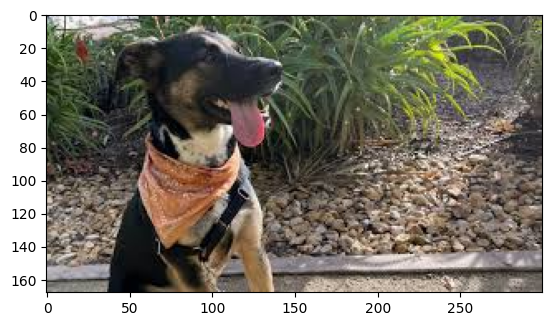

In [42]:
img2 = cv2.imread('test_puppy1.jpg')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.plot()

In [47]:
resize2 = tf.image.resize(img2, (256, 256))
input2 = np.expand_dims(resize2/255, 0)
ypred2 = model.predict(input2)
if ypred2[0] < 0.5:
    print("CAT")
else:
    print("DOG")

1/1 [==============================] - 0s 33ms/step
DOG


In [204]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))

C:\Users\Ayushi_Kansara\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
